### Introduction
According to the World Health Organization, stroke is the third highest cause of death internationally. Additionally, I am a survivor of a stroke,
having suffered one in the fall of 2024. Because of this, I was curious about what health factor is most closely tied to the likelihood of having a 
stroke. To solve this question, I found a dataset on Kaggle and applied some data visualization methods to get a better idea of what risk factors were 
most closely tied to strokes. 


### Requirements
First, Python must be downloaded on your computer. I used the Anaconda distribution. To house my program, I used Jupyter Notebook. To run 
the data visualization techniques a few Python libraries must be imported into the program. I primarily used Pandas, Matplotlib, and Seaborn.


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Description
The first thing was to find a usable dataset. To do this I went to Kaggle and searched “Stroke Data.” I found a few data sets and chose the one that 
was the cleanest. Next, I created a Jupyter Notebook to house the program. I imported Pandas, Matplotlib, and Seaborn. The last part of the preparation 
was to read the CSV file as a panda data frame.


In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.isnull().sum())
print(df.shape)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
(5110, 12)


Now that the CSV was a useable data frame, I needed to clean any issues with the data. To check I ran .isnull(). The table indicated that the only 
column with null values was the Body Mass Index column. BMI had 201 null values. I briefly considered trying to find a way to fill in the null values 
but realized that I could not look up the correct values and that filling in the null values with a mean or median would skew the results. To Solve 
the issue, I chose to just drop the null rows altogether using dropna(). I ran isnull() again to see if the values were removed and then I moved onto
data visualization. My goal in data visualization was to look at each risk factor individually when compared to whether a stroke occurred. To do this 
I went column by column and created a table for each one. 


In [6]:
dfClean = df.dropna()
print(dfClean.isnull().sum())
print(dfClean.shape)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
(4909, 12)


My first useable column was gender. To better visualize how gender affected stroke I created a set of data that only looked at men and one that 
only looked at women. With these two data sets, I used the Pandas function value_counts() to get a count of men who had strokes and women who had 
strokes. Then I used Matplotlib to put both sets of data into their own pie charts. The pie charts showed that the percentage of strokes for both 
men and women was around 4%, indicating that gender was not a strong indicator of stroke.


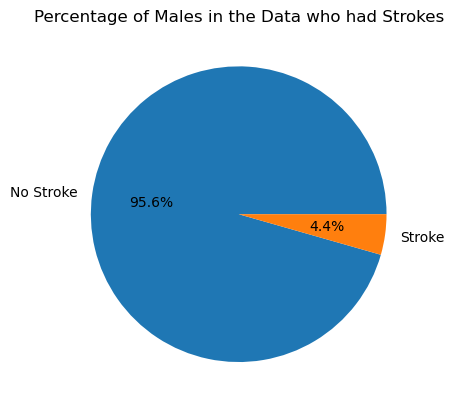

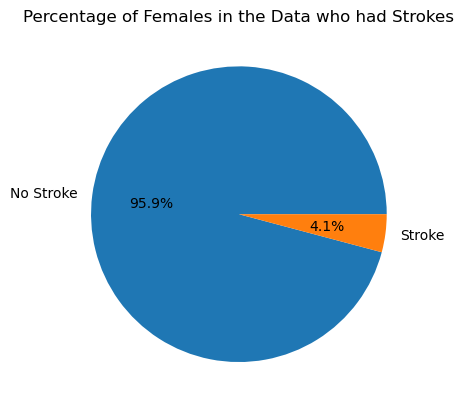

In [7]:
maleData = dfClean[dfClean['gender']=='Male']
femaleData = dfClean[dfClean['gender']=='Female']

maleStrokeCount = maleData['stroke'].value_counts()
femaleStrokeCount = femaleData['stroke'].value_counts()

labels =['No Stroke', 'Stroke']

plt.title('Percentage of Males in the Data who had Strokes') 
plt.pie(maleStrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()

plt.title('Percentage of Females in the Data who had Strokes') 
plt.pie(femaleStrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()


The next column I looked at was age. To get the best visualization of how age affected stroke, I created a histogram using Matplotlib. The distribution
in the histogram showed that the majority of strokes occurred in the highest age bracket. In fact, for the whole histogram, as age increased the number
of strokes increased. This was my first strong piece of evidence, but I wanted to continue looking at the other factors.


Text(0, 0.5, 'Number of People')

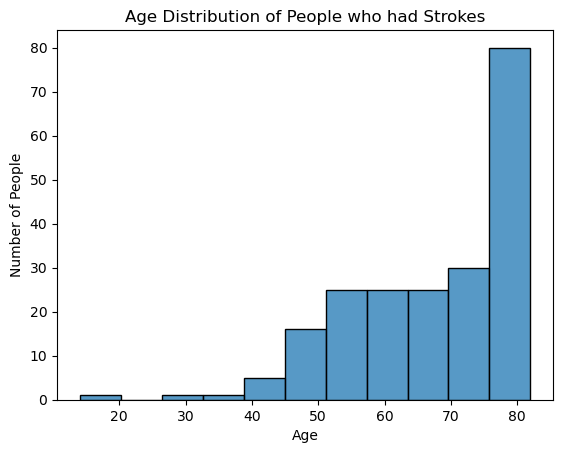

In [8]:
sns.histplot(dfClean[dfClean['stroke']==1]['age'])
plt.title('Age Distribution of People who had Strokes')
plt.xlabel('Age')
plt.ylabel('Number of People')


The next data point I looked at was hypertension. To compare hypertension and stroke I created a countplot() using Seaborn. After viewing the graph
it appeared to me that a higher percentage of people who had hypertension had strokes. The data was not clear on the count plot, so I decided to 
return to hypertension later and move on to the next risk factor.


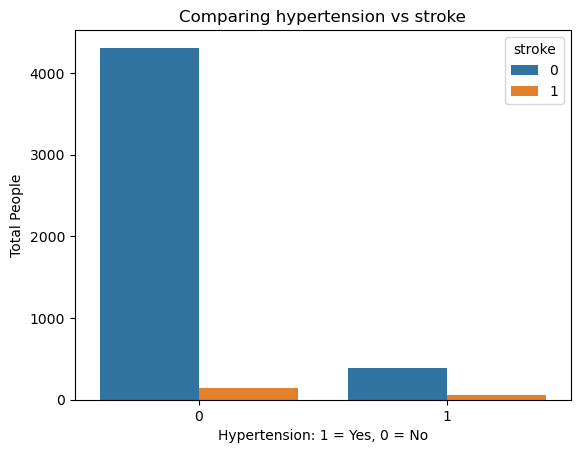

In [9]:
sns.countplot( x='hypertension', hue='stroke', data=dfClean)
plt.title('Comparing hypertension vs stroke')
plt.xlabel('Hypertension: 1 = Yes, 0 = No')
plt.ylabel('Total People')
plt.show()


My next data point was heart disease and stroke. To visualize this, I chose to create a heatmap using seaborn. First, I needed to create a cross table 
using the Pandas function crosstab. After creating the table, I used it to create the heatmap. Looking at the heat map. heart disease and stroke was 
the lowest occurrence, heart disease and stroke was the second lowest, and heart disease no stroke was the third lowest occurrence. The highest was no 
heart disease no stroke. This data seemed to point to not a strong correlation between heart disease and stroke.


stroke            0    1
heart_disease           
0              4497  169
1               203   40


<Axes: xlabel='stroke', ylabel='heart_disease'>

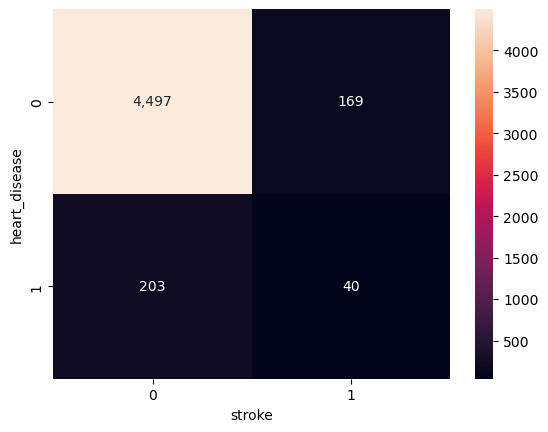

In [10]:
crossTable = pd.crosstab(dfClean['heart_disease'],dfClean['stroke'])
print(crossTable)

sns.heatmap(crossTable,annot=True, fmt=',d')


Whether the person was ever married or not was my next data point. To visualize this data, I again created two separate counts of married and never 
married vs. stroke. I used those counts to create two separate pie charts using Matplotlib. After looking at the data, it appeared that people who 
were never married had a lower occurrence of stroke, by about 4%. While not insignificant, I wanted to see if there was a stronger indicator. 


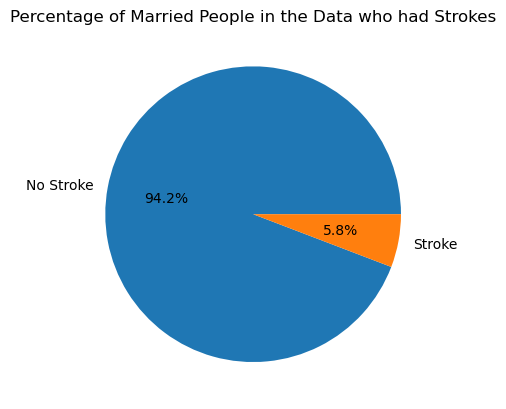

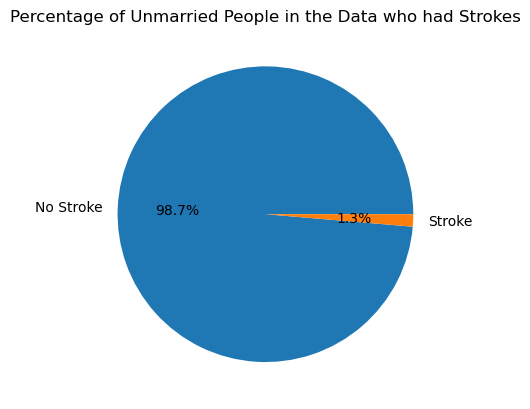

In [11]:
marriedData = dfClean[dfClean['ever_married']=='Yes']
unmarriedData = dfClean[dfClean['ever_married']=='No']

marriedStrokeCount = marriedData['stroke'].value_counts()
unmarriedStrokeCount = unmarriedData['stroke'].value_counts()

labels =['No Stroke', 'Stroke']

plt.title('Percentage of Married People in the Data who had Strokes') 
plt.pie(marriedStrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()

plt.title('Percentage of Unmarried People in the Data who had Strokes') 
plt.pie(unmarriedStrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()


The next two data points I looked at were occupation and residence type. To visualize occupation, I created a heatmap using Seaborn. Viewing the 
heatmap, there did not seem to be a strong relationship between stroke and occupation, so I moved on to residence. For residence, I created a 
counterplot using Seaborn. Again, there was not a strong relationship between residence type and stroke. 


stroke            0    1
work_type               
Govt_job        602   28
Never_worked     22    0
Private        2684  127
Self-employed   722   53
children        670    1


<Axes: xlabel='stroke', ylabel='work_type'>

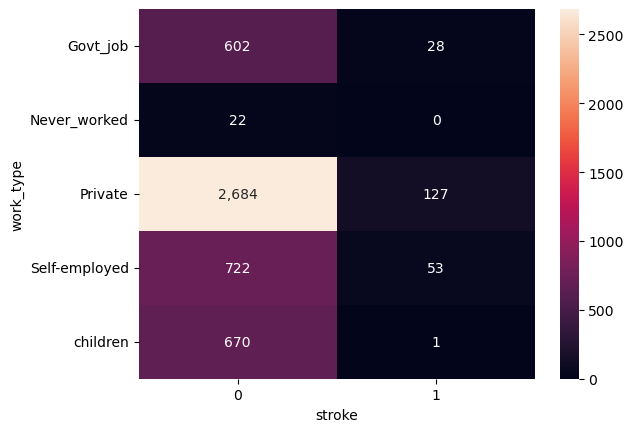

In [12]:
crossTable2 = pd.crosstab(dfClean['work_type'],dfClean['stroke'])
print(crossTable2)

sns.heatmap(crossTable2,annot=True, fmt=',d')

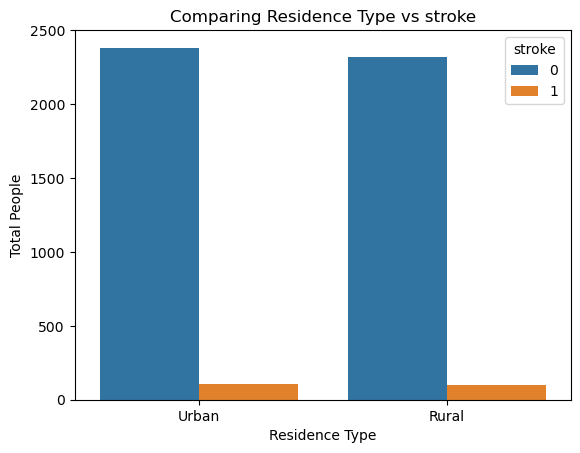

In [13]:
sns.countplot(x='Residence_type',hue='stroke',data=dfClean)
plt.title('Comparing Residence Type vs stroke')
plt.xlabel('Residence Type')
plt.ylabel('Total People')
plt.show()


The next data point was average blood glucose level, which was my guess for the best indicator before I started this analysis. To visualize the 
continuous data that was blood glucose, I decided to use a box and whisker plot. I used seaborn to create the boxplot of average blood stroke vs 
average blood glucose level. When viewing the data, the mean and the upper quartile for those who had stroke was higher than those who didn’t have 
stroke, with the upper quartile being significantly higher. This seemed to indicate that a higher blood glucose level could lead to a stroke, but 
there were more data points to look at. 


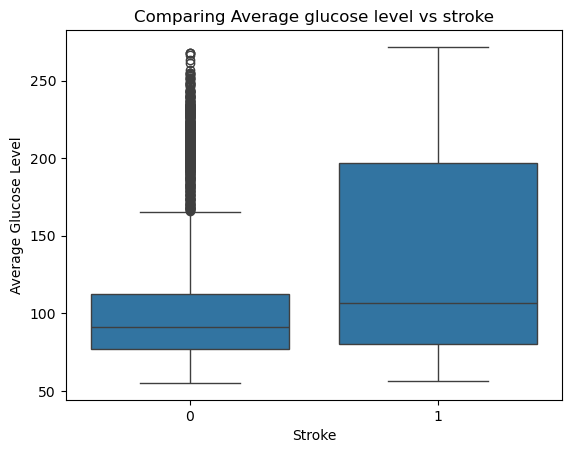

In [14]:
sns.boxplot(x='stroke',y='avg_glucose_level', data=dfClean)
plt.title('Comparing Average glucose level vs stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()


The next data point was Body mass index (BMI). To see the relationship between BMI, another continuous variable, and stroke I again used a box and 
whisker plot. After creating the plot with Seaborn, I saw that the data was not going to be a strong indicator. The mean, lower quartile, and upper 
quartile were all very similar between those who had strokes and those who did not. In fact, the population that did not have strokes had a higher 
variation of BMI.


<Axes: xlabel='stroke', ylabel='bmi'>

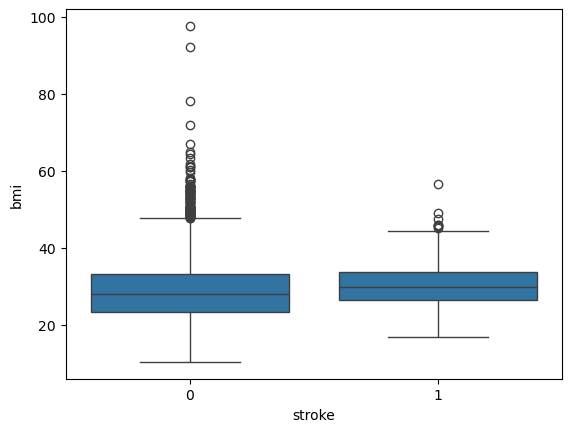

In [15]:
sns.boxplot(x='stroke',y='bmi',data=dfClean)

The last data point I needed to look at was whether the person had ever smoked. To view this data, I first took people who had strokes and found the
percentage of each categoryin the smoking status column and displayed it in a piechart. This seemed to indicate that a greater percentage of strokes
were tied to not smoking, but I thought this may be misleading. To find a better representation i found the percentage of each group from smoking status
who had a stroke. I again separated it into 4 sections: Nonsmoker,former smoker, current smoker, and unknown smoking status. After using the function 
value_counts() again, I showed the data in 4 pie charts. The pie charts showed a higher percentage of current and former smokers had strokes than 
nonsmokers or unknown. This showed that the original piechart was misleading and smoking is tied to a higher chance of stroke.

smoking_status
never smoked       84
formerly smoked    57
smokes             39
Unknown            29
Name: count, dtype: int64


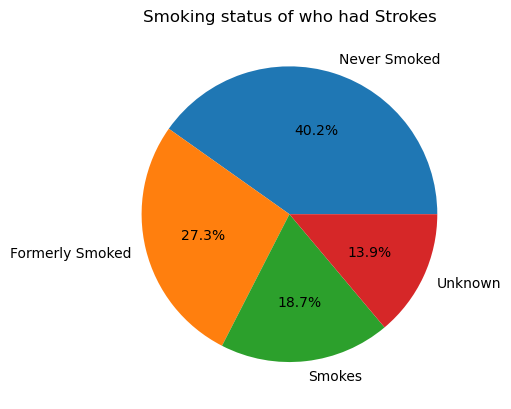

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


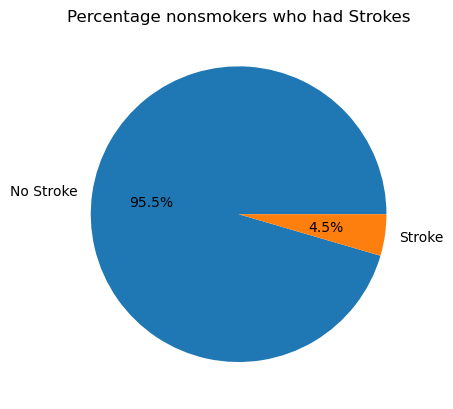

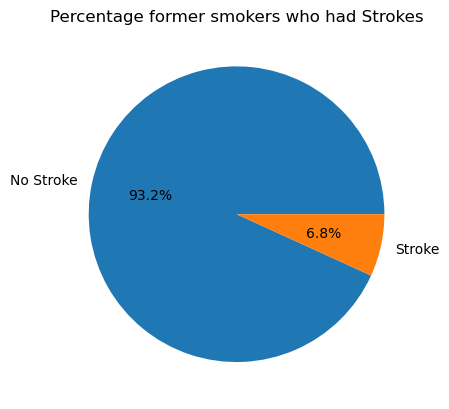

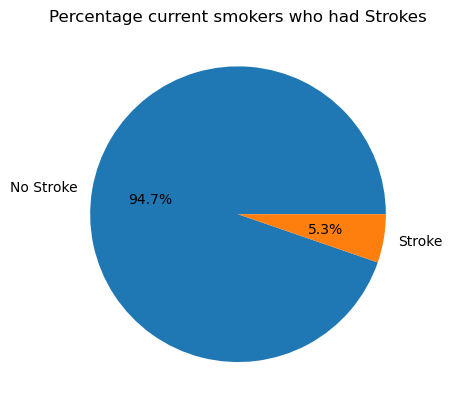

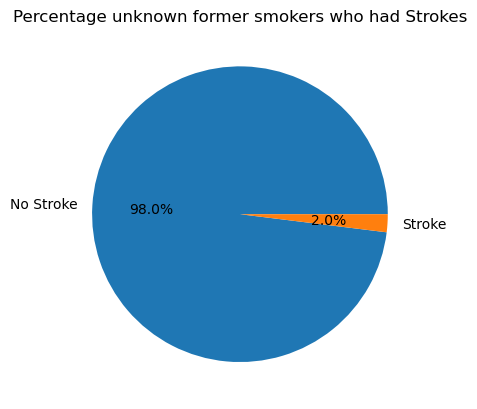

In [21]:
smkStat = dfClean[dfClean['stroke']==1]['smoking_status']
smkStatCount = smkStat.value_counts()
print(smkStatCount)
labels = ['Never Smoked','Formerly Smoked','Smokes','Unknown']
plt.title('Smoking status of who had Strokes') 
plt.pie(smkStatCount, labels = labels,autopct ='%1.1f%%')
plt.show()


smk = dfClean['smoking_status'].unique()
print(smk)
fSMK = dfClean[dfClean['smoking_status']=='formerly smoked']
nSMK = dfClean[dfClean['smoking_status']=='never smoked']
sSMK = dfClean[dfClean['smoking_status']=='smokes']
uSMK = dfClean[dfClean['smoking_status']=='Unknown']

fSMK_StrokeCount = fSMK['stroke'].value_counts()
nSMK_StrokeCount = nSMK['stroke'].value_counts()
sSMK_StrokeCount = sSMK['stroke'].value_counts()
uSMK_StrokeCount = uSMK['stroke'].value_counts()

labels =['No Stroke', 'Stroke']

plt.title('Percentage nonsmokers who had Strokes') 
plt.pie(nSMK_StrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()

plt.title('Percentage former smokers who had Strokes') 
plt.pie(fSMK_StrokeCount, labels = labels,autopct='%1.1f%%')
plt.show()

plt.title('Percentage current smokers who had Strokes') 
plt.pie(sSMK_StrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()

plt.title('Percentage unknown former smokers who had Strokes') 
plt.pie(uSMK_StrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()


After viewing each data point, I wanted to revisit one of them, hypertension. To get a better view of the relationship between hypertension and stroke,
I again broke the data into two sets and used value_counts(). After getting the counts I created two pie charts using Matplotlib. This graph was a much
better indicator of the relationship between hypertension and stroke. It indicated that stroke occurred at a 10% higher rate in those who had 
hypertension. With this I had my data.


stroke
0    391
1     60
Name: count, dtype: int64


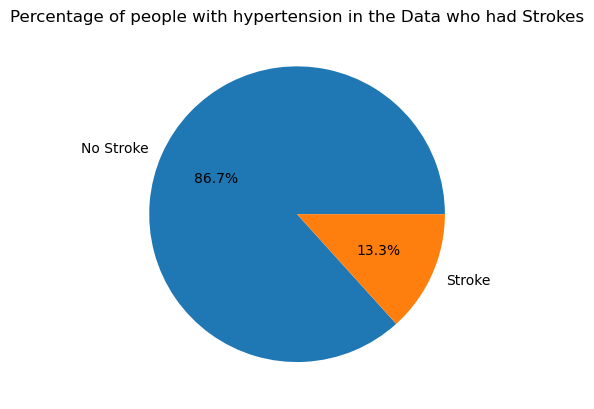

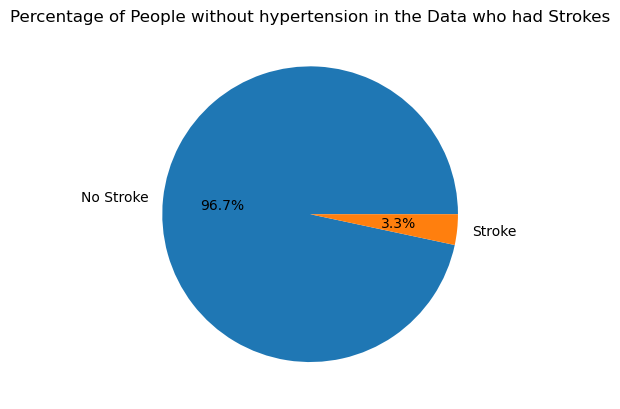

In [101]:
hyp = dfClean[dfClean['hypertension']==1]
nohyp = dfClean[dfClean['hypertension']==0]

hypStrokeCount = hyp['stroke'].value_counts()
nohypStrokeCount = nohyp['stroke'].value_counts()


labels =['No Stroke', 'Stroke']

plt.title('Percentage of people with hypertension in the Data who had Strokes') 
plt.pie(hypStrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()

plt.title('Percentage of People without hypertension in the Data who had Strokes') 
plt.pie(nohypStrokeCount, labels = labels,autopct ='%1.1f%%')
plt.show()


# Conclusion
After viewing my data, I felt I could break the connection of each data type and stroke into three categories. High indicator of stroke, a weak 
indicator of stroke, and inconclusive. For high indicators of stroke, I found hypertension, age, and average blood glucose level. These indicators 
show the strongest relationship to whether or not the person had a stroke. For weak indicators, I found smoking and, surprisingly, marital status were
both indicators. I had originally suspected that smoking would be a strong indicator and never would have guessed marital status had any relationship 
to stroke. To further explore the relationship between marital status and stroke, more data is needed. For inconclusive indicators, I found gender, 
heart disease, occupation type, residence type, and BMI. While not all of the results surprised me, heart disease and BMI showing inconclusive 
relationships to stroke was not what I expected. 

According to the data, hypertension has the strongest relationship with stroke. While this was not the data point I suspected at the beginning of my 
project, it is by no means surprising. Other risk factors that seem to not line up with expectations could be a result of the data. With only 
approximately 5000 people in the table, and only approximately 200 of those having a stroke, it is not a large dataset. To form a better understanding
in the future, multiple datasets should be used. 


# References
https://www.nhlbi.nih.gov/health/stroke/causes

https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

